In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn import metrics

import random

In [3]:
import sys
sys.path.append('../')
import dataimport.prepareDataset as prep

In [4]:
random.seed(141)

are there features which don't have any further content/ don't change over the whole periode


In [5]:
Part_chro=['13','22','10', '18']
Part_reco=['19','20','02','09']



In [6]:

[X_Base,X_Anes,X_Reco,Y_ID_Base,Y_ID_Anes,Y_ID_Reco,
 Y_out_Anes,Y_out_Base,Y_out_Reco ]=prep.prepare_Dataset('data/NEW_wPLI_all_10_1_left.pickle')

define 30% test set 
!!!! only used to select the hyperparameters 

In [7]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y_out,Y_ID,random_state=0,test_size=0.3)
X_train_Base,X_test_Base,Y_train_Base,Y_test_Base,Y_ID_Base_train,Y_ID_Base_test=train_test_split(X_Base,Y_out_Base,Y_ID_Base,random_state=0,test_size=0.3)
X_train_Reco,X_test_Reco,Y_train_Reco,Y_test_Reco,Y_ID_Reco_train,Y_ID_Reco_test=train_test_split(X_Reco,Y_out_Reco,Y_ID_Reco,random_state=0,test_size=0.3)
X_train_Anes,X_test_Anes,Y_train_Anes,Y_test_Anes,Y_ID_Anes_train,Y_ID_Anes_test=train_test_split(X_Anes,Y_out_Anes,Y_ID_Anes,random_state=0,test_size=0.3)


LOGISTIC REGRESSION
  I Hyperparameter search

In [8]:
from sklearn.linear_model import LogisticRegression

cs=np.arange(1,5,0.5)
lr_accuracy_Base=[]
lr_accuracy_Anes=[]
lr_accuracy_Reco=[]

for c in cs:
    lr=LogisticRegression(random_state=0,penalty='l1',C=c,solver='liblinear',max_iter=10000)
    lr.fit(X_train_Base,Y_train_Base)
    P_lr=lr.predict(X_test_Base)
    lr_accuracy_Base.append(metrics.accuracy_score(Y_test_Base, P_lr))

    lr=LogisticRegression(random_state=0,penalty='l1',C=c,solver='liblinear',max_iter=10000)
    lr.fit(X_train_Anes,Y_train_Anes)
    P_lr=lr.predict(X_test_Anes)
    lr_accuracy_Anes.append(metrics.accuracy_score(Y_test_Anes, P_lr))

    lr=LogisticRegression(random_state=0,penalty='l1',C=c,solver='liblinear',max_iter=10000)
    lr.fit(X_train_Reco,Y_train_Reco)
    P_lr=lr.predict(X_test_Reco)
    lr_accuracy_Reco.append(metrics.accuracy_score(Y_test_Reco, P_lr))

#feat_importances_Reco = pd.Series(lr.coef_[0], index=X.columns)
#feat_importances_Reco.plot(kind='barh')

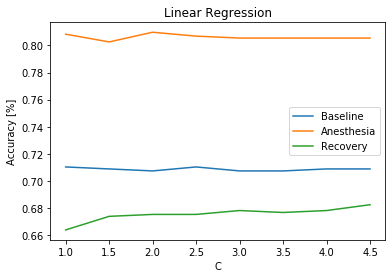

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline

plt.plot(cs,lr_accuracy_Base)
plt.plot(cs,lr_accuracy_Anes)
plt.plot(cs,lr_accuracy_Reco)
plt.ylabel('Accuracy [%]')
plt.xlabel('C')
plt.title('Linear Regression')
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.show()
plt.savefig('wPLI_LogReg_hyper.png',dpi=150)

In [10]:
from sklearn.linear_model import LogisticRegression


cv_LR_Base=[]
cv_LR_Anes=[]
cv_LR_Reco=[]

FI_LR_Base=[]
FI_LR_Anes=[]
FI_LR_Reco=[]

for r in range(0,4):
    for c in range (0,4):
        tmp_X_test_Base=X_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_X_train_Base=X_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        tmp_Y_test_Base=Y_out_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_Y_train_Base=Y_out_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]

        tmp_X_test_Anes=X_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_X_train_Anes=X_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]
        tmp_Y_test_Anes=Y_out_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_Y_train_Anes=Y_out_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]

        tmp_X_test_Reco=X_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_X_train_Reco=X_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]
        tmp_Y_test_Reco=Y_out_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_Y_train_Reco=Y_out_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]

        lr = LogisticRegression(random_state=0, penalty='l1', C=4,solver='liblinear',max_iter=10000)
        lr.fit(tmp_X_train_Base, tmp_Y_train_Base)
        P_lr = lr.predict(tmp_X_test_Base)
        cv_LR_Base.append(metrics.accuracy_score(tmp_Y_test_Base, P_lr))
        FI_LR_Base.append(lr.coef_)

        lr = LogisticRegression(random_state=0, penalty='l1', C=4,solver='liblinear',max_iter=10000)
        lr.fit(tmp_X_train_Anes, tmp_Y_train_Anes)
        P_lr = lr.predict(tmp_X_test_Anes)
        cv_LR_Anes.append(metrics.accuracy_score(tmp_Y_test_Anes, P_lr))
        FI_LR_Anes.append(lr.coef_)

        lr = LogisticRegression(random_state=0, penalty='l1', C=4,solver='liblinear',max_iter=10000)
        lr.fit(tmp_X_train_Reco, tmp_Y_train_Reco)
        P_lr = lr.predict(tmp_X_test_Reco)
        cv_LR_Reco.append(metrics.accuracy_score(tmp_Y_test_Reco, P_lr))
        FI_LR_Reco.append(lr.coef_)

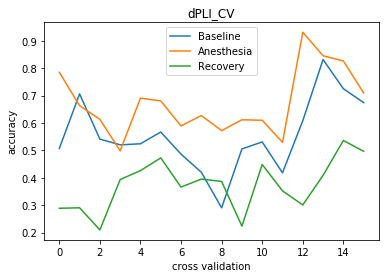

In [11]:
plt.plot(cv_LR_Base)
plt.plot(cv_LR_Anes)
plt.plot(cv_LR_Reco)
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.xlabel('cross validation')
plt.ylabel('accuracy')
plt.title('dPLI_CV')
plt.savefig('wPLI_LogRefg_CV.png',dpi=150)

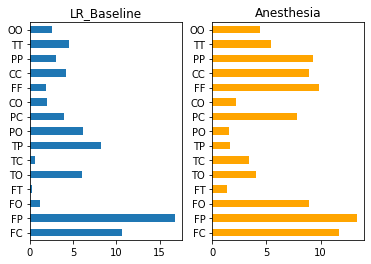

In [12]:
right_Anes = np.where(np.array(cv_LR_Anes) > 0.5)[0]
right_Base = np.where(np.array(cv_LR_Base) > 0.5)[0]
right_Reco = np.where(np.array(cv_LR_Reco) > 0.5)[0]

FI_LR_Base= list(FI_LR_Base[i] for i in right_Base)
FI_LR_Anes= list(FI_LR_Anes[i] for i in right_Anes)
FI_LR_Reco= list(FI_LR_Reco[i] for i in right_Reco)

feat_importances_Base_LR = pd.Series(abs(np.mean(FI_LR_Base[0:],axis=0)[0]), index=X_Base.columns)
feat_importances_Anes_LR = pd.Series(abs(np.mean(FI_LR_Anes[0:],axis=0)[0]), index=X_Base.columns)
feat_importances_Reco_LR = pd.Series(abs(np.mean(FI_LR_Reco[0:],axis=0)[0]), index=X_Base.columns)

plt.subplot(121)
feat_importances_Base_LR.plot(kind='barh')
plt.title('LR_Baseline')
plt.subplot(122)
feat_importances_Anes_LR.plot(kind='barh',color='orange')
plt.title('Anesthesia')
plt.savefig('wPLI_LogRefg_features.png',dpi=150)
#plt.subplot(133)
#feat_importances_Reco_LR.plot(kind='barh',color='green')
#plt.title('Recovery')

In [13]:
np.mean(cv_LR_Base)
np.std(cv_LR_Base)

np.mean(cv_LR_Anes)
np.std(cv_LR_Anes)

np.mean(cv_LR_Reco)
np.std(cv_LR_Reco)


0.09060716954580683

SVM (sklearn)


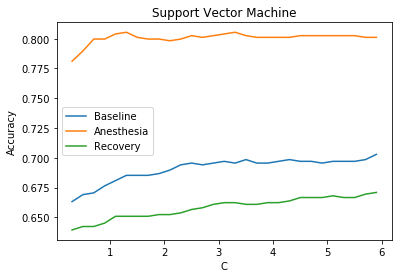

<Figure size 432x288 with 0 Axes>

In [14]:
cs=np.arange(0.3,6,0.2)

svm_accuracy_Base=[]
svm_accuracy_Anes=[]
svm_accuracy_Reco=[]

for c in cs:
    svm_model = svm.LinearSVC(C=c, loss="hinge" , max_iter=1000000)
    svm_model.fit(X_train_Base,Y_train_Base)
    P_lr=svm_model.predict(X_test_Base)
    svm_accuracy_Base.append(metrics.accuracy_score(Y_test_Base, P_lr))

    svm_model = svm.LinearSVC(C=c, loss="hinge", max_iter=1000000)
    svm_model.fit(X_train_Anes,Y_train_Anes)
    P_lr=svm_model.predict(X_test_Anes)
    svm_accuracy_Anes.append(metrics.accuracy_score(Y_test_Anes, P_lr))

    svm_model = svm.LinearSVC(C=c, loss="hinge", max_iter=1000000)
    svm_model.fit(X_train_Reco,Y_train_Reco)
    P_lr=svm_model.predict(X_test_Reco)
    svm_accuracy_Reco.append(metrics.accuracy_score(Y_test_Reco, P_lr))

plt.plot(cs,svm_accuracy_Base)
plt.plot(cs,svm_accuracy_Anes)
plt.plot(cs,svm_accuracy_Reco)
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.title('Support Vector Machine')
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.show()
plt.savefig('wPLI_SVM_hyper.png',dpi=150)

In [15]:
cv_SVM_Base=[]
cv_SVM_Anes=[]
cv_SVM_Reco=[]

FI_SVM_Base=[]
FI_SVM_Anes=[]
FI_SVM_Reco=[]


for r in range(0,4):
    for c in range (0,4):
        tmp_X_test_Base=X_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_X_train_Base=X_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]
        tmp_Y_test_Base=Y_out_Base[(Y_ID_Base == Part_reco[r]) | (Y_ID_Base == Part_chro[c])]
        tmp_Y_train_Base=Y_out_Base[(Y_ID_Base != Part_reco[r]) & (Y_ID_Base != Part_chro[c])]

        tmp_X_test_Anes=X_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_X_train_Anes=X_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]
        tmp_Y_test_Anes=Y_out_Anes[(Y_ID_Anes == Part_reco[r]) | (Y_ID_Anes == Part_chro[c])]
        tmp_Y_train_Anes=Y_out_Anes[(Y_ID_Anes != Part_reco[r]) & (Y_ID_Anes != Part_chro[c])]

        tmp_X_test_Reco=X_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_X_train_Reco=X_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]
        tmp_Y_test_Reco=Y_out_Reco[(Y_ID_Reco == Part_reco[r]) | (Y_ID_Reco == Part_chro[c])]
        tmp_Y_train_Reco=Y_out_Reco[(Y_ID_Reco != Part_reco[r]) & (Y_ID_Reco != Part_chro[c])]

        svm_model = svm.LinearSVC(C=4, loss="hinge", max_iter=100000)
        svm_model.fit(tmp_X_train_Base, tmp_Y_train_Base)
        P_lr = svm_model.predict(tmp_X_test_Base)
        cv_SVM_Base.append(metrics.accuracy_score(tmp_Y_test_Base, P_lr))
        FI_SVM_Base.append(svm_model.coef_.flatten())

        svm_model = svm.LinearSVC(C=4, loss="hinge", max_iter=100000)
        svm_model.fit(tmp_X_train_Anes, tmp_Y_train_Anes)
        P_lr = svm_model.predict(tmp_X_test_Anes)
        cv_SVM_Anes.append(metrics.accuracy_score(tmp_Y_test_Anes, P_lr))
        FI_SVM_Anes.append(svm_model.coef_.flatten())

        svm_model = svm.LinearSVC(C=4, loss="hinge", max_iter=100000)
        svm_model.fit(tmp_X_train_Reco, tmp_Y_train_Reco)
        P_lr = svm_model.predict(tmp_X_test_Reco)
        cv_SVM_Reco.append(metrics.accuracy_score(tmp_Y_test_Reco, P_lr))
        FI_SVM_Reco.append(svm_model.coef_.flatten())

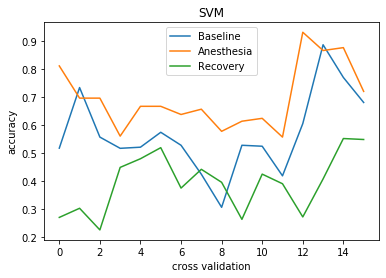

In [16]:
plt.plot(cv_SVM_Base)
plt.plot(cv_SVM_Anes)
plt.plot(cv_SVM_Reco)
plt.legend(['Baseline','Anesthesia','Recovery'])
plt.xlabel('cross validation')
plt.ylabel('accuracy')
plt.title('SVM')
plt.savefig('wPLI_SVM_CV.png',dpi=150)

In [17]:
np.mean(cv_SVM_Base)

0.5696857060564527

In [18]:
np.std(cv_SVM_Base)

0.13881751562189582

In [19]:
np.mean(cv_SVM_Anes)

0.6988831615120275

In [20]:
np.std(cv_SVM_Anes)

0.11214960377191326

In [21]:
np.mean(cv_SVM_Reco)

0.396155498281787

In [22]:
np.std(cv_SVM_Reco)

0.10085260950976825

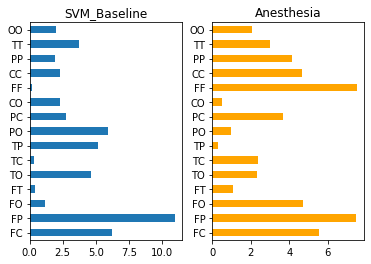

In [23]:
right_Anes = np.where(np.array(cv_SVM_Anes) > 0.5)[0]
right_Base = np.where(np.array(cv_SVM_Base) > 0.5)[0]
right_Reco = np.where(np.array(cv_SVM_Reco) > 0.5)[0]


FI_SVM_Base=pd.DataFrame(FI_SVM_Base)
FI_SVM_Anes=pd.DataFrame(FI_SVM_Anes)
FI_SVM_Reco=pd.DataFrame(FI_SVM_Reco)

feat_importances_Base_SVM_b = pd.Series(np.array(abs(np.mean(FI_SVM_Base.iloc[right_Base,:],axis=0))), index=X_Base.columns)
feat_importances_Anes_SVM_b = pd.Series(np.array(abs(np.mean(FI_SVM_Anes.iloc[right_Anes,:],axis=0))), index=X_Base.columns)
feat_importances_Reco_SVM_b = pd.Series(np.array(abs(np.mean(FI_SVM_Reco.iloc[right_Reco,:],axis=0))), index=X_Base.columns)

feat_importances_Base_SVM = pd.Series(np.array((np.mean(FI_SVM_Base.iloc[right_Base,:],axis=0))), index=X_Base.columns)
feat_importances_Anes_SVM = pd.Series(np.array((np.mean(FI_SVM_Anes.iloc[right_Anes,:],axis=0))), index=X_Base.columns)
feat_importances_Reco_SVM = pd.Series(np.array((np.mean(FI_SVM_Reco.iloc[right_Reco,:],axis=0))), index=X_Base.columns)


plt.subplot(121)
feat_importances_Base_SVM_b.plot(kind='barh')
plt.title('SVM_Baseline')
plt.subplot(122)
feat_importances_Anes_SVM_b.plot(kind='barh',color='orange')
plt.title('Anesthesia')
plt.savefig('wPLI_SVM_features.png',dpi=150)
#plt.subplot(133)
#feat_importances_Reco_SVM_b.plot(kind='barh',color='green')
#plt.title('Recovery')


Decision Tree

In [24]:
from sklearn import tree
import graphviz

#BAse
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Base,Y_out_Base)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_Base.columns, class_names=['Chronic', 'recovered'],
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('wPLI_Decision_Tree_Base')

#Anes
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Anes,Y_out_Anes)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X_Base.columns, class_names=['Chronic', 'recovered'],
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('wPLI_Decision_Tree_Anes')



'wPLI_Decision_Tree_Anes.pdf'